<IPython.core.display.Javascript object>


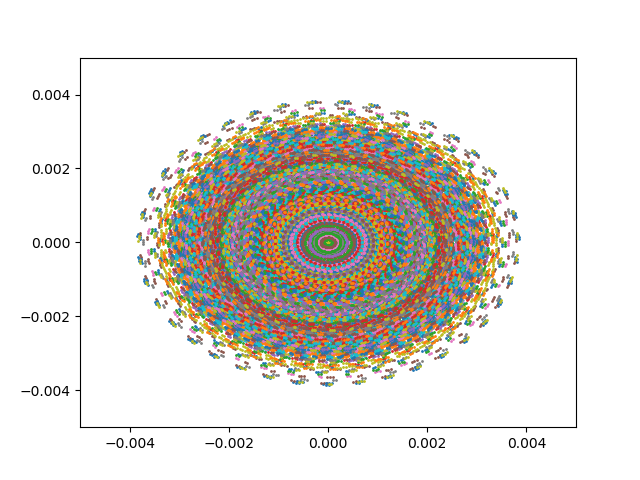

In [16]:
from map2D import map2D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib notebook

resonance=1.0/4.0
dvx=0.0030
dvy=0.0030
#resonance=1.0/4.0
#dvx=0.0001
#dvy=0.0001

#resonance=1.0/5.0
#dvx=0.0001
#dvy=-0.0001


pxs=np.concatenate([0.0001*np.arange(20), np.array([],dtype=np.float64)])
pxps=np.zeros_like(pxs)
particles=np.vstack([pxs,pxps])
#xpx=map2D(npart=10, twiss=[1,0], twiss_beam=[1,0],tune=resonance+dvx, chrom=0.0, espr=0.0, particles=particles)

xpx=map2D(npart=5000, emit=1e-6, twiss=[1.0,0.0],twiss_beam=[1,0],tune=0.1025, chrom=0.0, espr=0.0)
ypy=map2D(npart=5000, emit=1e-6, twiss=[1.0,0.0],twiss_beam=[1,0],tune=0.2975, chrom=0.0, espr=0.0)

pys=0.000*np.zeros_like(pxs)
pyps=np.zeros_like(pys)
particles=np.vstack([pys,pyps])
#ypy=map2D(npart=len(pxs), twiss=[1,0], twiss_beam=[1,0],tune=resonance+dvy, chrom=0.0, espr=0.0,particles=particles, 
#          emit=0.1e-6)

avex,avep,sizex,sizep,emit=xpx.statistics()
emitlistx=[]
sizelistx=[]
avelistx=[]

emitlisty=[]
sizelisty=[]
avelisty=[]

N_turn=100



def evolve_func(turns, kick_turn_start=0, B2=00.0,B2S0=100,
               ):
    for i in range(turns):
        B2S = B2S0*np.cos(2 * np.pi *i/turns)
        if i>=kick_turn_start:
            xpx.coor2D[1,:]-=B2 *(xpx.coor2D[0,:]*xpx.coor2D[0,:]-ypy.coor2D[0,:]*ypy.coor2D[0,:])/2.0 - B2S*ypy.coor2D[0,:]*xpx.coor2D[0,:]
            ypy.coor2D[1,:]+=B2S*(xpx.coor2D[0,:]*xpx.coor2D[0,:]-ypy.coor2D[0,:]*ypy.coor2D[0,:])/2.0 + B2 *ypy.coor2D[0,:]*xpx.coor2D[0,:]
        
        xpx.propagate()
        ypy.propagate()
        
        avex,avepx,sizex,sizepx,emitx=xpx.statistics()
        avey,avepy,sizey,sizepx,emity=ypy.statistics()
        #avelist.append(avex)
        #sizelist.append(sizex)
        emitlistx.append(emitx)
        emitlisty.append(emity)        
        yield xpx.coor2D
        #yield ypy.coor2D

        
        
def evolve_func_oct(turns, kick_turn_start=0, B3=0,B3S=10,
               ):
    for i in range(turns):
        #B3S = B3S0*np.cos(2 * np.pi *i/turns)
        #B3 = B30*np.cos(2 * np.pi *i/turns)        
        if i>=kick_turn_start:
            
            preal = (xpx.coor2D[0,:]*xpx.coor2D[0,:]*xpx.coor2D[0,:]-3*xpx.coor2D[0,:]*ypy.coor2D[0,:]*ypy.coor2D[0,:])
            pimage =(3*ypy.coor2D[0,:]*xpx.coor2D[0,:]*xpx.coor2D[0,:]-ypy.coor2D[0,:]*ypy.coor2D[0,:]*ypy.coor2D[0,:])
            
            xpx.coor2D[1,:]-=(B3S*preal + B3 * pimage)/6.0
            ypy.coor2D[1,:]+=(B3 *preal - B3S* pimage)/6.0
        
        xpx.propagate()
        ypy.propagate()
        
        avex,avepx,sizex,sizepx,emitx=xpx.statistics()
        avey,avepy,sizey,sizepx,emity=ypy.statistics()
        #avelist.append(avex)
        #sizelist.append(sizex)
        emitlistx.append(emitx)
        emitlisty.append(emity)        
        yield xpx.coor2D
        #yield ypy.coor2D
        
evolve=evolve_func_oct(N_turn+2)
    
fig,ax=plt.subplots()
ax.set_xlim([-0.005,0.005])
ax.set_ylim([-0.005,0.005])
xlist=[]
xplist=[]



for i in range(N_turn):
    arr=next(evolve)
    #if np.max(arr)>1: break
    xlist.append(arr[0])
    xplist.append(arr[1])
xarr=np.vstack(xlist)
xparr=np.vstack(xplist)
ax.plot(xarr,xparr,linestyle='None', marker='.', markersize=2)
#ax.set_xticks([])
#ax.set_yticks([])
Jx=xarr*xarr+xparr*xparr
#fig.savefig("test.png",dpi=300,transparent=True)

<IPython.core.display.Javascript object>


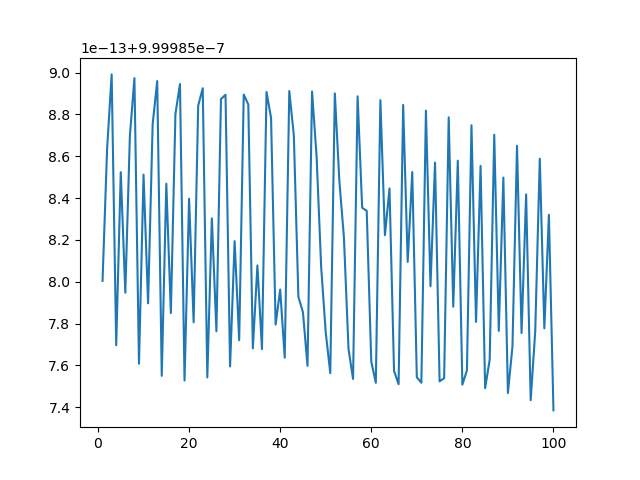

In [17]:
Turns_Arra=np.linspace(1, N_turn, num=N_turn)
fig,ax=plt.subplots()
#ax.plot(turns,emitlistx,turns,emitlisty)
ax.plot(Turns_Arra,emitlisty)

<IPython.core.display.Javascript object>


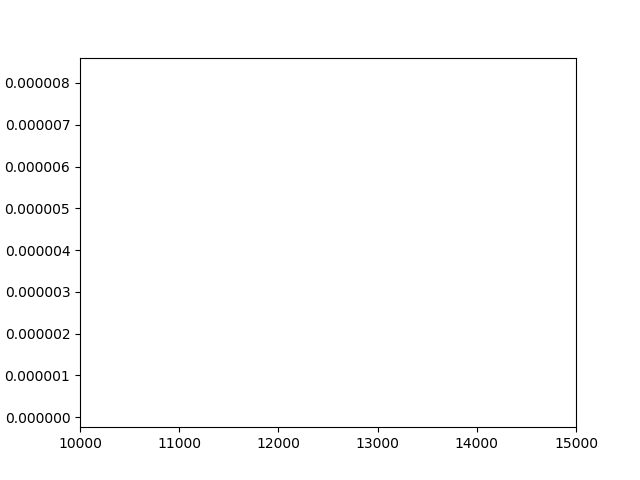

In [94]:
fig,ax=plt.subplots()
ax.set_xlim([10000,15000])
for i in range(8):
    ax.plot(Jx[:,i+1])


In [19]:
emitlisty

[9.999858004177811e-07,
 9.99985863585629e-07,
 9.999858991556173e-07,
 9.999857696412024e-07,
 9.999858523988419e-07,
 9.999857947665293e-07,
 9.999858696796989e-07,
 9.999858973569322e-07,
 9.99985760824173e-07,
 9.99985851238401e-07,
 9.999857896959976e-07,
 9.99985875284979e-07,
 9.99985895981815e-07,
 9.999857550252059e-07,
 9.999858468816493e-07,
 9.99985785034642e-07,
 9.999858801836007e-07,
 9.999858945461883e-07,
 9.999857527585222e-07,
 9.999858397182729e-07,
 9.999857806176563e-07,
 9.99985884227128e-07,
 9.999858925233423e-07,
 9.999857542713099e-07,
 9.999858303314887e-07,
 9.999857763134376e-07,
 9.999858873380594e-07,
 9.99985889406947e-07,
 9.999857595138657e-07,
 9.99985819438842e-07,
 9.999857720453567e-07,
 9.99985889504709e-07,
 9.99985884772999e-07,
 9.999857681370014e-07,
 9.99985807821905e-07,
 9.999857678064915e-07,
 9.999858907702645e-07,
 9.999858783343349e-07,
 9.999857795171714e-07,
 9.999857962517648e-07,
 9.999857636657045e-07,
 9.99985891217389e-07,
 9.99